In [1]:
import os
import sys
import numpy as np
import pandas as pd
import math as mt
sys.path.insert(0, os.path.abspath('..'))

from autocnet.examples import get_path
from autocnet.graph.network import CandidateGraph
from autocnet.graph.edge import Edge
from autocnet.matcher.matcher import FlannMatcher

from IPython.display import display

%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [9]:
adjacency = get_path('two_image_adjacency.json')
basepath = get_path('Apollo15')
cg = CandidateGraph.from_adjacency(adjacency, basepath=basepath)

#Apply SIFT to extract features
cg.extract_features(method='sift', extractor_parameters={'nfeatures':500})

#Match
cg.match_features()

#Apply outlier detection
cg.apply_func_to_edges(Edge.symmetry_check)
cg.apply_func_to_edges(Edge.ratio_check)
m = cg.edge[0][1].masks
cg.minimum_spanning_tree()

#Compute a homography and apply RANSAC
cg.compute_fundamental_matrices(clean_keys = ['ratio', 'symmetry'])

In [10]:
cg.edge[0][1]._masks

,symmetry,ratio
0,False,False
1,False,False
2,False,True
3,False,False
4,False,True
5,False,False
6,False,True
7,False,False
8,False,True
9,False,False


KeyError: "['fundamental'] not in index"

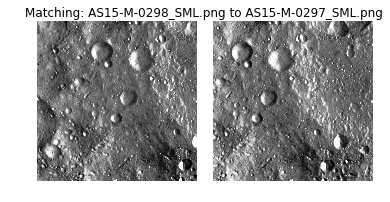

In [11]:
cg.edge[0][1].plot(clean_keys = ['fundamental'])

In [ ]:
cg.node[1].plot()

4


/scratch/anaconda3/envs/autocnet_k/lib/python3.5/site-packages/pandas/core/frame.py:1997: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


ValueError: Number of points not in range

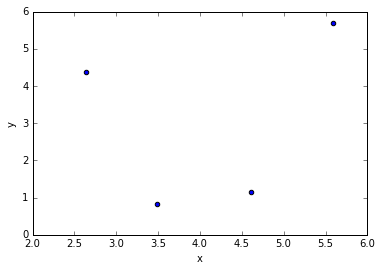

In [45]:
df[minimum.mask].plot(kind = 'scatter', x = 'x', y = 'y')
print(len(df[minimum.mask]))

if len(df[minimum.mask]) not in range (1, 2):
    raise ValueError('Number of points not in range')

(100, 100)


/home/acpaquette/autocnet/autocnet/matcher/outlier_detector.py:265: UserWarning: Unable to optimally solve.  Returning with 17 points
  warnings.warn('Unable to optimally solve.  Returning with {} points'.format(len(result)))


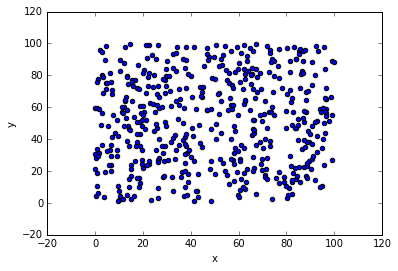

In [20]:
r = np.random.RandomState(12345)
df = pd.DataFrame(r.uniform(0,100,(500, 3)), columns=['x', 'y', 'strength'])
minimum = SpatialSuppression(df, (100,100), k = 15)

print(minimum.domain)
minimum.suppress()
df.plot(kind = 'scatter', x = 'x', y = 'y')

17


/scratch/anaconda3/envs/autocnet_k/lib/python3.5/site-packages/pandas/core/frame.py:1997: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


NameError: name 'assertIsInstance' is not defined

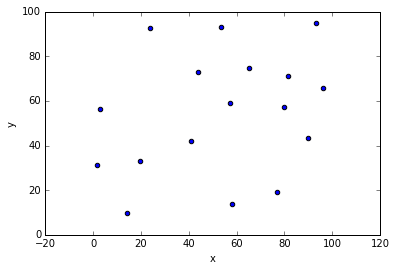

In [21]:
df[minimum.mask].plot(kind = 'scatter', x = 'x', y = 'y')
print(len(df[minimum.mask]))

assertIsInstance(df[minimum.mask], (3, 5))